In [ ]:
import pandas as pd
# Load dataframes

weather_newark_2020 = pd.read_csv("hourly_weather_newark_2020.csv")
weather_newark_2021 = pd.read_csv("hourly_weather_newark_2021.csv")
weather_newark_2022 = pd.read_csv("hourly_weather_newark_2022.csv")
weather_newark_2023 = pd.read_csv("hourly_weather_newark_2023.csv")

In [ ]:
#combining weather data into one dataframe
weather_newark_2020_2023 = pd.concat([weather_newark_2020, weather_newark_2021, weather_newark_2022, weather_newark_2023])

#stays the same for all models
date_categories = pd.read_excel("Date_Catagories.xlsx")

In [ ]:
#removing na values
weather_newark_2020_2023 = weather_newark_2020_2023.dropna()

#Remove units from Temperature and DewPoint
temps = []
for i in weather_newark_2020_2023["Temperature"]:
    temps.append(i.split("F")[0])

weather_newark_2020_2023["Temperature"] = temps

dewpoint = []
for i in weather_newark_2020_2023["Dew Point"]:
    dewpoint.append(i.split("F")[0])

weather_newark_2020_2023["Dew Point"] = dewpoint

#Remove units from Humidity
humidity = []
for i in weather_newark_2020_2023["Humidity"]:
    humidity.append(i.split("%")[0])

weather_newark_2020_2023["Humidity"] = humidity

#Remove units from Wind Speed and Wind Gust
speeds = []
for i in weather_newark_2020_2023["Wind Speed"]:
    speeds.append(i.split("m")[0])

weather_newark_2020_2023["Wind Speed"] = speeds

gusts = []
for i in weather_newark_2020_2023["Wind Gust"]:
    gusts.append(i.split("m")[0])

weather_newark_2020_2023["Wind Gust"] = gusts
#Removing units from Pressure and Precipitation
pressure = []
for i in weather_newark_2020_2023["Pressure"]:
    pressure.append(i.split("i")[0])

weather_newark_2020_2023["Pressure"] = pressure

percipitation = []
for i in weather_newark_2020_2023["Precipitation"]:
    percipitation.append(i.split("i")[0])

weather_newark_2020_2023["Precipitation"] = percipitation

#view df with no units
weather_newark_2020_2023

<ipython-input-47-9646e92ade69>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_newark_2020_2023["Temperature"] = temps
<ipython-input-47-9646e92ade69>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_newark_2020_2023["Dew Point"] = dewpoint
<ipython-input-47-9646e92ade69>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

Time Temperature Dew Point Humidity Wind Wind Speed  \
0           1/1/2020 1:51          40        28       63    W         14   
1           1/1/2020 2:51          39        29       67    W         14   
2           1/1/2020 3:51          39        28       65    W         10   
3           1/1/2020 4:51          39        26       60    W         12   
4           1/1/2020 5:51          38        26       62  WNW         13   
...                   ...         ...       ...      ...  ...        ...   
9924   2023-12-31 8:51 PM          43        27       53  WSW          6   
9925   2023-12-31 9:51 PM          43        28       56    W          8   
9926  2023-12-31 10:51 PM          43        28       56   SW          7   
9927  2023-12-31 11:51 PM          43        29       58  WSW          7   
9928  2023-12-31 12:51 AM          42        29       60   SW          9   

     Wind Gust Pressure Precipitation      Condition  
0            0    29.64           0.0         Cloudy  
1            0    29.65           0.0  Mostly Cloudy  
2            0    29.66           0.0         Cloudy  
3            0    29.67           0.0  Mostly Cloudy  
4            0    29.68           0.0     Light Snow  
...        ...      ...           ...            ...  
9924         0    30.00           0.0         Cloudy  
9925         0    30.00           0.0         Cloudy  
9926         0    29.99           0.0         Cloudy  
9927         0    30.00           0.0         Cloudy  
9928         0    30.00           0.0         Cloudy  

[39750 rows x 10 columns]

In [ ]:
#remove wind column
weather_newark_2020_2023 = weather_newark_2020_2023.drop(columns = "Wind")
#reformatting to use pd.to_datetime
date = []
for i in weather_newark_2020_2023["Time"]:
    if "-" in i:
        year = i.split("-")[0]
        month = i.split("-")[1]
        day = i.split("-")[2][:2]
        time = i.split("-")[2][3:]

        if "AM" in time and time[:2] == "12":
            time = "00" + time[2:5]
        elif "AM" in time:
            time = time[:-3]
        elif "PM" in time and ":" in time[0:2]:
            time =  str(int(time[0]) + 12) + time[1:-3]
        elif "PM" in time and time[:2] == "12":
            time =  time[:-3]
        elif "PM" in time:
            time =  str(int(time[0:2]) + 12) + time[2:-3]

        time = time[:-2]
        time = time + "00"

        if len(month) == 1 and len(day) == 1:
            date.append("0" + month + "/" + "0" + day + "/" + year + " " + time)
        if len(month) == 2 and len(day) == 1:
            date.append(month + "/" + "0" + day + "/" + year + " " + time)
        if len(month) == 1 and len(day) == 2:
            date.append("0" + month + "/" + day + "/" + year + " " + time)
        if len(month) == 2 and len(day) == 2:
            date.append(month + "/" + day + "/" + year + " " + time)

    else:
        time = i.split("/")[2][4:]
        time = time.split(":")[0] + ":" + "00"
        i = i.split(" ")[0] + " " + time
        date.append(i)

weather_newark_2020_2023["Time"] = date
weather_newark_2020_2023

Time Temperature Dew Point Humidity Wind Speed Wind Gust  \
0       1/1/2020  1:00          40        28       63         14         0   
1       1/1/2020  2:00          39        29       67         14         0   
2       1/1/2020  3:00          39        28       65         10         0   
3       1/1/2020  4:00          39        26       60         12         0   
4       1/1/2020  5:00          38        26       62         13         0   
...                ...         ...       ...      ...        ...       ...   
9924  12/31/2023 20:00          43        27       53          6         0   
9925  12/31/2023 21:00          43        28       56          8         0   
9926  12/31/2023 22:00          43        28       56          7         0   
9927  12/31/2023 23:00          43        29       58          7         0   
9928  12/31/2023 00:00          42        29       60          9         0   

     Pressure Precipitation      Condition  
0       29.64           0.0         Cloudy  
1       29.65           0.0  Mostly Cloudy  
2       29.66           0.0         Cloudy  
3       29.67           0.0  Mostly Cloudy  
4       29.68           0.0     Light Snow  
...       ...           ...            ...  
9924    30.00           0.0         Cloudy  
9925    30.00           0.0         Cloudy  
9926    29.99           0.0         Cloudy  
9927    30.00           0.0         Cloudy  
9928    30.00           0.0         Cloudy  

[39750 rows x 9 columns]

In [ ]:
#binary for condition
weather_newark_2020_2023 = pd.get_dummies(weather_newark_2020_2023, columns=['Condition'], prefix = "Condition", dtype = int)

In [ ]:
import numpy as np

weather_newark_2020_2023['Temperature'] = pd.to_numeric(weather_newark_2020_2023['Temperature'])
weather_newark_2020_2023['Dew Point'] = pd.to_numeric(weather_newark_2020_2023['Dew Point'])
weather_newark_2020_2023['Humidity'] = pd.to_numeric(weather_newark_2020_2023['Humidity'])
weather_newark_2020_2023['Wind Speed'] = pd.to_numeric(weather_newark_2020_2023['Wind Speed'])
weather_newark_2020_2023['Wind Gust'] = pd.to_numeric(weather_newark_2020_2023['Wind Gust'])
weather_newark_2020_2023['Pressure'] = pd.to_numeric(weather_newark_2020_2023['Pressure'])
weather_newark_2020_2023['Precipitation'] = pd.to_numeric(weather_newark_2020_2023['Precipitation'])

weather_newark_2020_2023_mean = weather_newark_2020_2023.groupby(['Time']).agg({'Temperature': np.mean, 'Dew Point': np.mean, 'Humidity': np.mean, 'Wind Speed': np.mean, 'Wind Gust': np.mean, 'Pressure': np.mean, 'Precipitation': np.mean,
                                                                           'Condition_Cloudy': np.max, 'Condition_Mostly Cloudy': np.max, 'Condition_Light Snow': np.max, 'Condition_Mostly Cloudy / Windy': np.max,
                                                                           'Condition_Cloudy / Windy': np.max, 'Condition_Fair': np.max, 'Condition_Partly Cloudy': np.max, 'Condition_Light Rain': np.max,
                                                                           'Condition_Light Drizzle': np.max, 'Condition_Rain': np.max, 'Condition_Fog': np.max, 'Condition_Wintry Mix': np.max, 'Condition_Partly Cloudy / Windy': np.max,
                                                                           'Condition_Fair / Windy': np.max, 'Condition_Light Snow / Windy': np.max, 'Condition_Light Rain / Windy': np.max, 'Condition_Wintry Mix / Windy': np.max, 'Condition_Light Snow and Sleet': np.max,
                                                                           'Condition_Rain / Windy': np.max, 'Condition_Heavy Rain': np.max, 'Condition_Haze': np.max, 'Condition_Drizzle and Fog': np.max, 'Condition_Heavy Rain / Windy': np.max,
                                                                           'Condition_T-Storm / Windy': np.max, 'Condition_Light Rain with Thunder': np.max, 'Condition_Heavy T-Storm / Windy': np.max, 'Condition_Heavy T-Storm': np.max, 'Condition_Light Sleet': np.max,
                                                                           'Condition_Thunder': np.max, 'Condition_T-Storm': np.max, 'Condition_Thunder in the Vicinity': np.max, 'Condition_Thunder / Windy': np.max, 'Condition_Snow': np.max,
                                                                           'Condition_Snow / Windy': np.max, 'Condition_Heavy Snow / Windy': np.max, 'Condition_Snow and Sleet / Windy': np.max, 'Condition_Snow and Sleet': np.max, 'Condition_Heavy Snow': np.max,
                                                                           'Condition_Light Freezing Rain': np.max, 'Condition_Light Freezing Drizzle': np.max, 'Condition_Squalls / Windy': np.max, 'Condition_Blowing Snow / Windy': np.max, 'Condition_Light Snow and Sleet / Windy': np.max,
                                                                           'Condition_Haze / Windy': np.max, 'Condition_Smoke': np.max, 'Condition_Mist': np.max, 'Condition_Light Drizzle / Windy': np.max})
weather_newark_2020_2023 = weather_newark_2020_2023_mean.reset_index()
weather_newark_2020_2023.head()


<ipython-input-50-9c89b7de9b42>:11: FutureWarning: The provided callable <function mean at 0x78f1b05f95a0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  weather_newark_2020_2023_mean = weather_newark_2020_2023.groupby(['Time']).agg({'Temperature': np.mean, 'Dew Point': np.mean, 'Humidity': np.mean, 'Wind Speed': np.mean, 'Wind Gust': np.mean, 'Pressure': np.mean, 'Precipitation': np.mean,
<ipython-input-50-9c89b7de9b42>:11: FutureWarning: The provided callable <function mean at 0x78f1b05f95a0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  weather_newark_2020_2023_mean = weather_newark_2020_2023.groupby(['Time']).agg({'Temperature': np.mean, 'Dew Point': np.mean, 'Humidity': np.mean, 'Wind Speed': np.mean, 'Wind Gust': np.mean, 'Pressu

Time  Temperature  Dew Point  Humidity  Wind Speed  Wind Gust  \
0  01/01/2022 00:00         52.0       52.0     100.0         8.0        0.0   
1  01/01/2022 10:00         51.5       50.5      96.5         8.5        0.0   
2  01/01/2022 11:00         53.0       52.0      96.0        12.0        0.0   
3  01/01/2022 12:00         53.5       53.0      98.5         9.5        0.0   
4  01/01/2022 13:00         55.0       54.0      96.0         8.0        0.0   

   Pressure  Precipitation  Condition_Cloudy  Condition_Mostly Cloudy  ...  \
0    29.530            0.0                 0                        0  ...   
1    29.825            0.0                 0                        0  ...   
2    29.780            0.0                 0                        0  ...   
3    29.765            0.0                 0                        0  ...   
4    29.740            0.0                 0                        0  ...   

   Condition_Heavy Snow  Condition_Light Freezing Rain  \
0                     0                              0   
1                     0                              0   
2                     0                              0   
3                     0                              0   
4                     0                              0   

   Condition_Light Freezing Drizzle  Condition_Squalls / Windy  \
0                                 0                          0   
1                                 0                          0   
2                                 0                          0   
3                                 0                          0   
4                                 0                          0   

   Condition_Blowing Snow / Windy  Condition_Light Snow and Sleet / Windy  \
0                               0                                       0   
1                               0                                       0   
2                               0                                       0   
3                               0                                       0   
4                               0                                       0   

   Condition_Haze / Windy  Condition_Smoke  Condition_Mist  \
0                       0                0               0   
1                       0                0               0   
2                       0                0               0   
3                       0                0               0   
4                       0                0               0   

   Condition_Light Drizzle / Windy  
0                                0  
1                                0  
2                                0  
3                                0  
4                                0  

[5 rows x 55 columns]

In [ ]:
weather_newark_2020_2023.dtypes


Time                                       object
Temperature                               float64
Dew Point                                 float64
Humidity                                  float64
Wind Speed                                float64
Wind Gust                                 float64
Pressure                                  float64
Precipitation                             float64
Condition_Cloudy                            int64
Condition_Mostly Cloudy                     int64
Condition_Light Snow                        int64
Condition_Mostly Cloudy / Windy             int64
Condition_Cloudy / Windy                    int64
Condition_Fair                              int64
Condition_Partly Cloudy                     int64
Condition_Light Rain                        int64
Condition_Light Drizzle                     int64
Condition_Rain                              int64
Condition_Fog                               int64
Condition_Wintry Mix                        int64
Condition_Partly Cloudy / Windy             int64
Condition_Fair / Windy                      int64
Condition_Light Snow / Windy                int64
Condition_Light Rain / Windy                int64
Condition_Wintry Mix / Windy                int64
Condition_Light Snow and Sleet              int64
Condition_Rain / Windy                      int64
Condition_Heavy Rain                        int64
Condition_Haze                              int64
Condition_Drizzle and Fog                   int64
Condition_Heavy Rain / Windy                int64
Condition_T-Storm / Windy                   int64
Condition_Light Rain with Thunder           int64
Condition_Heavy T-Storm / Windy             int64
Condition_Heavy T-Storm                     int64
Condition_Light Sleet                       int64
Condition_Thunder                           int64
Condition_T-Storm                           int64
Condition_Thunder in the Vicinity           int64
Condition_Thunder / Windy                   int64
Condition_Snow                              int64
Condition_Snow / Windy                      int64
Condition_Heavy Snow / Windy                int64
Condition_Snow and Sleet / Windy            int64
Condition_Snow and Sleet                    int64
Condition_Heavy Snow                        int64
Condition_Light Freezing Rain               int64
Condition_Light Freezing Drizzle            int64
Condition_Squalls / Windy                   int64
Condition_Blowing Snow / Windy              int64
Condition_Light Snow and Sleet / Windy      int64
Condition_Haze / Windy                      int64
Condition_Smoke                             int64
Condition_Mist                              int64
Condition_Light Drizzle / Windy             int64
dtype: object

In [ ]:
#Changing time to date time with pandas
weather_newark_2020_2023["Date"] = weather_newark_2020_2023["Time"].str.split(" ").str[0]
weather_newark_2020_2023["Time"] = pd.to_datetime(weather_newark_2020_2023["Time"])

weather_newark_2020_2023.head(30)

Time  Temperature  Dew Point  Humidity  Wind Speed  \
0  2022-01-01 00:00:00    52.000000  52.000000     100.0    8.000000   
1  2022-01-01 10:00:00    51.500000  50.500000      96.5    8.500000   
2  2022-01-01 11:00:00    53.000000  52.000000      96.0   12.000000   
3  2022-01-01 12:00:00    53.500000  53.000000      98.5    9.500000   
4  2022-01-01 13:00:00    55.000000  54.000000      96.0    8.000000   
5  2022-01-01 14:00:00    55.000000  54.000000      96.0    5.000000   
6  2022-01-01 15:00:00    55.000000  54.000000      96.0    6.000000   
7  2022-01-01 16:00:00    55.000000  54.000000      96.0    6.000000   
8  2022-01-01 17:00:00    55.000000  54.000000      96.0    5.000000   
9  2022-01-01 18:00:00    55.000000  54.000000      96.0    0.000000   
10 2022-01-01 19:00:00    54.000000  53.000000      97.0    3.000000   
11 2022-01-01 01:00:00    50.000000  48.500000      94.5    6.000000   
12 2022-01-01 20:00:00    54.000000  53.666667      99.0    1.000000   
13 2022-01-01 21:00:00    53.666667  53.666667     100.0    3.333333   
14 2022-01-01 22:00:00    53.000000  53.000000     100.0    8.000000   
15 2022-01-01 23:00:00    53.000000  53.000000     100.0   11.000000   
16 2022-01-01 02:00:00    50.000000  49.000000      96.0    0.000000   
17 2022-01-01 03:00:00    50.000000  48.000000      93.0    5.000000   
18 2022-01-01 04:00:00    50.000000  49.000000      96.0    6.000000   
19 2022-01-01 05:00:00    50.000000  49.000000      96.0    0.000000   
20 2022-01-01 06:00:00    49.500000  49.000000      98.0    0.000000   
21 2022-01-01 07:00:00    50.000000  50.000000     100.0    0.000000   
22 2022-01-01 08:00:00    50.000000  49.000000      96.0    3.000000   
23 2022-01-01 09:00:00    50.000000  50.000000     100.0    4.500000   
24 2023-01-01 00:00:00    48.000000  37.000000      66.0    3.000000   
25 2023-01-01 10:00:00    54.000000  43.000000      66.0   12.000000   
26 2023-01-01 11:00:00    55.000000  41.000000      59.0   15.000000   
27 2023-01-01 12:00:00    56.000000  38.000000      51.0    9.000000   
28 2023-01-01 13:00:00    56.000000  35.000000      45.0   18.000000   
29 2023-01-01 14:00:00    57.000000  33.000000      40.0   12.000000   

    Wind Gust   Pressure  Precipitation  Condition_Cloudy  \
0         0.0  29.530000       0.000000                 0   
1         0.0  29.825000       0.000000                 0   
2         0.0  29.780000       0.000000                 0   
3         0.0  29.765000       0.000000                 0   
4         0.0  29.740000       0.000000                 0   
5         0.0  29.720000       0.000000                 0   
6         0.0  29.690000       0.000000                 1   
7         0.0  29.680000       0.000000                 1   
8         0.0  29.690000       0.000000                 0   
9         0.0  29.690000       0.000000                 0   
10        0.0  29.690000       0.000000                 0   
11        0.0  29.890000       0.000000                 1   
12        0.0  29.673333       0.066667                 0   
13        0.0  29.636667       0.000000                 0   
14        0.0  29.600000       0.100000                 0   
15        0.0  29.593333       0.200000                 0   
16        0.0  29.880000       0.000000                 0   
17        0.0  29.860000       0.000000                 0   
18        0.0  29.840000       0.000000                 0   
19        0.0  29.830000       0.000000                 0   
20        0.0  29.815000       0.000000                 1   
21        0.0  29.810000       0.000000                 0   
22        0.0  29.800000       0.000000                 0   
23        0.0  29.810000       0.000000                 0   
24        0.0  30.010000       0.000000                 1   
25        0.0  29.910000       0.000000                 0   
26        0.0  29.930000       0.000000                 0   
27        0.0  29.910000       0.000000                 0   
28        0.0  2

In [ ]:
#merging date_categories and weather data together by date
weather_newark_2020_2023["Date"] = pd.to_datetime(weather_newark_2020_2023["Date"])
date_categories["Date"] = pd.to_datetime(date_categories["Date"])
weather_dateCategories_newark_2020_2023 = pd.merge(weather_newark_2020_2023, date_categories, on = "Date")

#remove rows with NaN values
weather_dateCategories_newark_2020_2023 = weather_dateCategories_newark_2020_2023.dropna()

weather_dateCategories_newark_2020_2023 = weather_dateCategories_newark_2020_2023.sort_values(by = "Time")

#This dataset is the newark weather data from 2020-2023 and the date category data for each of the dates
weather_dateCategories_newark_2020_2023.head(30)

Time  Temperature  Dew Point  Humidity  Wind Speed  \
13031 2020-01-01 00:00:00         29.0       19.0      67.0         7.0   
13042 2020-01-01 01:00:00         40.0       28.0      63.0        14.0   
13047 2020-01-01 02:00:00         39.0       29.0      67.0        14.0   
13048 2020-01-01 03:00:00         39.0       28.0      65.0        10.0   
13049 2020-01-01 04:00:00         39.0       26.0      60.0        12.0   
13050 2020-01-01 05:00:00         38.0       26.0      62.0        13.0   
13051 2020-01-01 06:00:00         36.0       28.5      74.5         8.5   
13052 2020-01-01 07:00:00         37.0       25.5      63.5        12.0   
13053 2020-01-01 08:00:00         37.0       24.0      59.0        12.0   
13054 2020-01-01 09:00:00         38.0       22.0      53.0        15.0   
13032 2020-01-01 10:00:00         39.0       20.0      46.0        17.0   
13033 2020-01-01 11:00:00         40.0       20.0      45.0        20.0   
13034 2020-01-01 12:00:00         40.0       19.0      43.0        18.0   
13035 2020-01-01 13:00:00         40.0       18.0      41.0        22.0   
13036 2020-01-01 14:00:00         39.0       18.0      43.0        20.0   
13037 2020-01-01 15:00:00         39.0       18.0      43.0        21.0   
13038 2020-01-01 16:00:00         39.0       19.0      45.0        17.0   
13039 2020-01-01 17:00:00         38.0       20.0      48.0        16.0   
13040 2020-01-01 18:00:00         38.0       20.0      48.0        13.0   
13041 2020-01-01 19:00:00         37.0       20.0      50.0        15.0   
13043 2020-01-01 20:00:00         36.0       19.0      50.0        15.0   
13044 2020-01-01 21:00:00         35.0       19.0      52.0         8.0   
13045 2020-01-01 22:00:00         34.0       19.0      54.0         6.0   
13046 2020-01-01 23:00:00         30.0       19.0      64.0         6.0   
13559 2020-01-02 00:00:00         44.0       34.0      68.0         3.0   
13570 2020-01-02 01:00:00         27.0       18.0      69.0         6.0   
13574 2020-01-02 02:00:00         29.0       21.0      72.0        10.0   
13575 2020-01-02 03:00:00         28.0       20.0      72.0         7.0   
13576 2020-01-02 04:00:00         27.0       20.0      75.0         6.0   
13577 2020-01-02 05:00:00         29.0       21.0      72.0         8.0   

       Wind Gust  Pressure  Precipitation  Condition_Cloudy  \
13031        0.0    29.900            0.0                 0   
13042        0.0    29.640            0.0                 1   
13047        0.0    29.650            0.0                 0   
13048        0.0    29.660            0.0                 1   
13049        0.0    29.670            0.0                 0   
13050        0.0    29.680            0.0                 0   
13051        0.0    29.695            0.0                 1   
13052       12.0    29.700            0.0                 1   
13053        0.0    29.710            0.0                 1   
13054       22.0    29.730            0.0                 1   
13032        0.0    29.750            0.0                 0   
13033       25.0    29.750            0.0                 0   
13034       30.0    29.740            0.0                 0   
13035       29.0    29.730            0.0                 0   
13036       26.0    29.730            0.0                 1   
13037       28.0    29.760            0.0                 0   
13038       24.0    29.780            0.0                 1   
13039       21.0    29.810            0.0                 0   
13040        0.0    29.830            0.0                 0   
13041        0.0    29.850            0.0                 0   
13043       20.0    29.870            0.0                 0   
13044        0.0    29.880            0.0                 0   
13045        0.0    29.890            0.0                 0   
13046        0.0    29.900            0.0                 0   
13559        0.0    29.820            0.0                 1   
13570        0.0    29.900            0.0                

In [ ]:
weather_dateCategories_newark_2020_2023.shape
weather_dateCategories_newark_2020_2023.dtypes

Time           datetime64[ns]
Temperature           float64
Dew Point             float64
Humidity              float64
Wind Speed            float64
                    ...      
September               int64
October                 int64
November                int64
December                int64
Holiday                 int64
Length: 71, dtype: object

In [ ]:
!pip install pyxlsb

In [ ]:
# Import JCPL Data
JCPL_CIEP_data = pd.read_excel("JCP&L_CIEP-Eligible_Hourly_Load_August_2024_Update.xlsb")

JCPL_RSCP_data = pd.read_excel("JCP&L_RSCP-Eligible_Hourly_Load_August_2024_Update.xlsb")

In [ ]:
# Clean JCPL data
JCPL_CIEP_data_clean = JCPL_CIEP_data.iloc[4:]
JCPL_CIEP_data_clean.columns = JCPL_CIEP_data_clean.iloc[0]
JCPL_CIEP_data_clean = JCPL_CIEP_data_clean[1:]
JCPL_CIEP_data_clean.columns = JCPL_CIEP_data_clean.columns.fillna("Date")

JCPL_RSCP_data_clean = JCPL_RSCP_data.iloc[4:]
JCPL_RSCP_data_clean.columns = JCPL_RSCP_data_clean.iloc[0]
JCPL_RSCP_data_clean.columns = JCPL_RSCP_data_clean.iloc[0]
JCPL_RSCP_data_clean = JCPL_RSCP_data_clean[1:]
JCPL_RSCP_data_clean.columns = JCPL_RSCP_data_clean.columns.fillna("Date")

In [ ]:
JCPL_RSCP_data_clean.head()

4   Date    Hour 1    Hour 2    Hour 3    Hour 4    Hour 5    Hour 6  \
5  44348   1326.27  1162.289  1169.503  1141.465  1187.247  1221.392   
6  44349  1434.951  1292.142  1227.344  1177.729  1168.013  1218.363   
7  44350  1438.801  1319.737  1242.828  1186.345  1181.638  1248.879   
8  44351  1678.245  1536.478  1461.513  1416.301  1405.049  1444.654   
9  44352  1628.995  1463.626   1409.18  1339.202  1316.288   1285.66   

4    Hour 7    Hour 8    Hour 9  ...   Hour 15   Hour 16   Hour 17   Hour 18  \
5  1285.902  1406.507   1464.35  ...  1849.879  1896.216  2031.813  2114.456   
6  1292.029  1421.439  1560.555  ...  2083.323  2143.599  2150.757  2197.798   
7  1334.301  1503.755  1666.921  ...  2035.873  2156.121  2275.613  2365.341   
8  1544.548    1720.3  1907.107  ...  2477.286  2595.471  2530.364  2313.517   
9  1319.853  1434.255  1631.335  ...  3223.631  3474.538  3637.423  3800.812   

4   Hour 19   Hour 20   Hour 21   Hour 22   Hour 23   Hour 24  
5  2146.334  2128.469  2108.581  2032.671  1822.124  1596.439  
6  2193.605  2147.998  2122.721  2062.668  1862.484  1615.469  
7    2400.3  2355.026   2317.69  2212.223  2052.624  1845.653  
8  2296.337  2324.764    2256.2  2217.287  2038.104  1808.891  
9  3776.825  3587.194  3355.317  3152.043  2865.963    2575.3  

[5 rows x 25 columns]

In [ ]:
#convert total days column to date column
from datetime import timedelta
date0 = pd.to_datetime("1/1/1900")
for i, row in JCPL_CIEP_data_clean.iterrows():
    daysSince = int(row['Date'])
    daysSince = daysSince-2
    row['Date'] = (date0 + timedelta(days = daysSince)).strftime("%Y-%m-%d")

from datetime import timedelta
date0 = pd.to_datetime("1/1/1900")
for i, row in JCPL_RSCP_data_clean.iterrows():
    daysSince = int(row['Date'])
    daysSince = daysSince-2
    row['Date'] = (date0 + timedelta(days = daysSince)).strftime("%Y-%m-%d")

JCPL_RSCP_data_clean.head()

4        Date    Hour 1    Hour 2    Hour 3    Hour 4    Hour 5    Hour 6  \
5  2021-06-01   1326.27  1162.289  1169.503  1141.465  1187.247  1221.392   
6  2021-06-02  1434.951  1292.142  1227.344  1177.729  1168.013  1218.363   
7  2021-06-03  1438.801  1319.737  1242.828  1186.345  1181.638  1248.879   
8  2021-06-04  1678.245  1536.478  1461.513  1416.301  1405.049  1444.654   
9  2021-06-05  1628.995  1463.626   1409.18  1339.202  1316.288   1285.66   

4    Hour 7    Hour 8    Hour 9  ...   Hour 15   Hour 16   Hour 17   Hour 18  \
5  1285.902  1406.507   1464.35  ...  1849.879  1896.216  2031.813  2114.456   
6  1292.029  1421.439  1560.555  ...  2083.323  2143.599  2150.757  2197.798   
7  1334.301  1503.755  1666.921  ...  2035.873  2156.121  2275.613  2365.341   
8  1544.548    1720.3  1907.107  ...  2477.286  2595.471  2530.364  2313.517   
9  1319.853  1434.255  1631.335  ...  3223.631  3474.538  3637.423  3800.812   

4   Hour 19   Hour 20   Hour 21   Hour 22   Hour 23   Hour 24  
5  2146.334  2128.469  2108.581  2032.671  1822.124  1596.439  
6  2193.605  2147.998  2122.721  2062.668  1862.484  1615.469  
7    2400.3  2355.026   2317.69  2212.223  2052.624  1845.653  
8  2296.337  2324.764    2256.2  2217.287  2038.104  1808.891  
9  3776.825  3587.194  3355.317  3152.043  2865.963    2575.3  

[5 rows x 25 columns]

In [ ]:
JCPL_CIEP_data_clean = JCPL_CIEP_data_clean.reset_index(drop = True)
JCPL_CIEP_data_RSCP_data_clean = JCPL_RSCP_data_clean.reset_index(drop = True)
JCPL_RSCP_data_clean.head()

4        Date    Hour 1    Hour 2    Hour 3    Hour 4    Hour 5    Hour 6  \
5  2021-06-01   1326.27  1162.289  1169.503  1141.465  1187.247  1221.392   
6  2021-06-02  1434.951  1292.142  1227.344  1177.729  1168.013  1218.363   
7  2021-06-03  1438.801  1319.737  1242.828  1186.345  1181.638  1248.879   
8  2021-06-04  1678.245  1536.478  1461.513  1416.301  1405.049  1444.654   
9  2021-06-05  1628.995  1463.626   1409.18  1339.202  1316.288   1285.66   

4    Hour 7    Hour 8    Hour 9  ...   Hour 15   Hour 16   Hour 17   Hour 18  \
5  1285.902  1406.507   1464.35  ...  1849.879  1896.216  2031.813  2114.456   
6  1292.029  1421.439  1560.555  ...  2083.323  2143.599  2150.757  2197.798   
7  1334.301  1503.755  1666.921  ...  2035.873  2156.121  2275.613  2365.341   
8  1544.548    1720.3  1907.107  ...  2477.286  2595.471  2530.364  2313.517   
9  1319.853  1434.255  1631.335  ...  3223.631  3474.538  3637.423  3800.812   

4   Hour 19   Hour 20   Hour 21   Hour 22   Hour 23   Hour 24  
5  2146.334  2128.469  2108.581  2032.671  1822.124  1596.439  
6  2193.605  2147.998  2122.721  2062.668  1862.484  1615.469  
7    2400.3  2355.026   2317.69  2212.223  2052.624  1845.653  
8  2296.337  2324.764    2256.2  2217.287  2038.104  1808.891  
9  3776.825  3587.194  3355.317  3152.043  2865.963    2575.3  

[5 rows x 25 columns]

In [ ]:
# Convert JCPL_RSCP_data_clean into a series
JCPL_RSCP_dataset_clean = JCPL_RSCP_data_clean.loc[JCPL_RSCP_data_clean['Date'] <= '2023-12-31']
JCPL_RSCP_series = pd.Series()

for index in range(len(JCPL_RSCP_dataset_clean)):
    current_series = JCPL_RSCP_dataset_clean.iloc[index][1:].add_prefix(str(JCPL_RSCP_dataset_clean["Date"].iloc[index] + ' '))
    # Concatenate it to the main series
    JCPL_RSCP_series = pd.concat([JCPL_RSCP_series, current_series])

print(JCPL_RSCP_series)

2021-06-01 Hour 1       1326.27
2021-06-01 Hour 2      1162.289
2021-06-01 Hour 3      1169.503
2021-06-01 Hour 4      1141.465
2021-06-01 Hour 5      1187.247
                        ...    
2023-12-31 Hour 20    2256.7946
2023-12-31 Hour 21    2184.0908
2023-12-31 Hour 22    2090.0859
2023-12-31 Hour 23    1976.6697
2023-12-31 Hour 24     1852.558
Length: 22656, dtype: object


In [ ]:
JCPL_RSCP_series.shape

(22656,)

In [ ]:
#begin LightGBM Model
import lightgbm as lgb
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import utils
from sklearn import metrics

In [ ]:
weather_dateCategories_newark_2020_2023 = weather_dateCategories_newark_2020_2023.loc[(weather_dateCategories_newark_2020_2023['Date'] >= '2021-06-01') & (weather_dateCategories_newark_2020_2023['Date'] <= '2023-12-31')]
print(weather_dateCategories_newark_2020_2023.shape)
print(JCPL_RSCP_series.shape)

(22561, 71)
(22656,)


In [ ]:
counts = weather_dateCategories_newark_2020_2023["Date"].value_counts().sort_index()
print(counts[counts < 24])

Date
2021-07-09    23
2021-12-31     6
2022-01-14    23
2022-01-15    22
2022-01-31    22
2022-03-13     2
2022-03-30    23
2022-05-17    23
2022-06-04    23
2022-06-14    23
2022-07-21    23
2022-11-06    23
2023-01-20    23
2023-03-12     2
2023-09-07    15
2023-09-08    15
2023-11-05    23
2023-11-20    23
Name: count, dtype: int64


In [ ]:
#add hours to JCPL_RSCP_df
JCPL_RSCP_df = JCPL_RSCP_series.to_frame().reset_index()
JCPL_RSCP_df["Hour"] = JCPL_RSCP_df["index"].str.split(" ").str[1:].str[1]

JCPL_RSCP_df["Hour"] = JCPL_RSCP_df["Hour"] + ":00:00"

index = 0
for i in JCPL_RSCP_df["Hour"]:
    if len(i) == 7:
        JCPL_RSCP_df["Hour"][index] = "0" + i
    if i == "24:00:00":
        JCPL_RSCP_df["Hour"][index] = "00:00:00"
    index += 1

JCPL_RSCP_df['index'] = JCPL_RSCP_df['index'].str.split(' ').str[0] + " " + JCPL_RSCP_df['Hour']
JCPL_RSCP_df = JCPL_RSCP_df.drop(columns = ["Hour"])

Streaming output truncated to the last 5000 lines.

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  JCPL_RSCP_df["Hour"][index] = "0" + i
<ipython-input-66-da87ef36e5a0>:10: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the ass

In [ ]:
JCPL_RSCP_df

index          0
0      2021-06-01 01:00:00    1326.27
1      2021-06-01 02:00:00   1162.289
2      2021-06-01 03:00:00   1169.503
3      2021-06-01 04:00:00   1141.465
4      2021-06-01 05:00:00   1187.247
...                    ...        ...
22651  2023-12-31 20:00:00  2256.7946
22652  2023-12-31 21:00:00  2184.0908
22653  2023-12-31 22:00:00  2090.0859
22654  2023-12-31 23:00:00  1976.6697
22655  2023-12-31 00:00:00   1852.558

[22656 rows x 2 columns]

In [ ]:
#compare the times and find differences
JCPL_RSCP_df['index'] = pd.to_datetime(JCPL_RSCP_df["index"])

compare = JCPL_RSCP_df['index'].isin(weather_dateCategories_newark_2020_2023["Time"])

index = 1
for i in compare:
    if i == False:
        JCPL_RSCP_df = JCPL_RSCP_df.drop(index)
    index += 1

In [ ]:
JCPL_RSCP_df = JCPL_RSCP_df.drop(columns = ['index'])
weather_dateCategories_newark_2020_2023 = weather_dateCategories_newark_2020_2023.drop(columns = ['Time'])
weather_dateCategories_newark_2020_2023 = weather_dateCategories_newark_2020_2023.drop(columns = ['Date'])

JCPL_RSCP_df = JCPL_RSCP_df.astype('int')
JCPL_RSCP_df.dtypes

0    int64
dtype: object

In [ ]:
JCPL_RSCP_df = JCPL_RSCP_df.squeeze()
type(JCPL_RSCP_df)

pandas.core.series.Series

In [ ]:
#changing feature
weather_dateCategories_newark_2020_2023 = weather_dateCategories_newark_2020_2023[['Temperature', 'Pressure', 'Dew Point', 'Humidity', 'Wind Speed', 'Weekday']]

In [ ]:
# split into training and testing
weather_dateCategories_newark_2020_2023_training, weather_dateCategories_newark_2020_2023_testing, JCPL_training, JCPL_testing = train_test_split(weather_dateCategories_newark_2020_2023, JCPL_RSCP_df, test_size = 0.33, random_state = 1)


In [ ]:
from lightgbm import LGBMClassifier

# Define the model with improved parameters
model_JCPL_RSCP = LGBMClassifier(
    learning_rate=0.05,
    n_estimators=200,
    max_depth=15,
    min_child_weight=1,
    subsample=0.8,             # Using 80% of the data for training each tree
    colsample_bytree=0.8,      # Using 80% of features for training each tree
    verbosity=-1,
    random_state=1,
    class_weight='balanced'
)

# Fit the model
model_JCPL_RSCP.fit(weather_dateCategories_newark_2020_2023_training, JCPL_training)

LGBMClassifier(class_weight='balanced', colsample_bytree=0.8,
               learning_rate=0.05, max_depth=15, min_child_weight=1,
               n_estimators=200, random_state=1, subsample=0.8, verbosity=-1)

In [ ]:
#training accuracy
print(model_JCPL_RSCP.score(weather_dateCategories_newark_2020_2023_training, JCPL_training))
#testing accuracy
print(model_JCPL_RSCP.score(weather_dateCategories_newark_2020_2023_testing, JCPL_testing))

0.40284485610320875
0.0012087026591458502


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

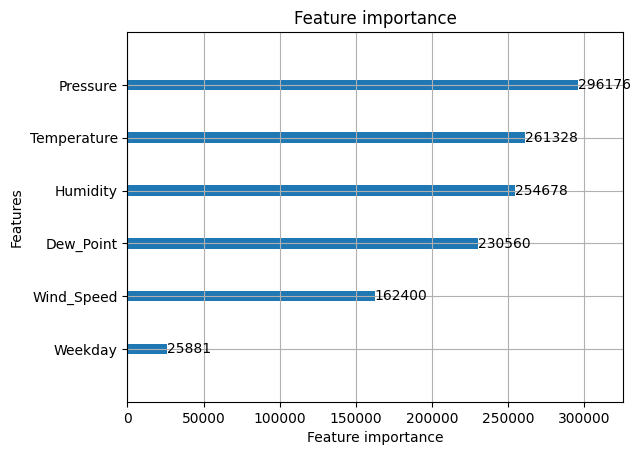

In [ ]:
lgb.plot_importance(model_JCPL_RSCP)

In [ ]:
print(metrics.classification_report(JCPL_testing, model_JCPL_RSCP.predict(weather_dateCategories_newark_2020_2023_testing)))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
         985       0.00      0.00      0.00         0
        1001       0.00      0.00      0.00         1
        1016       0.00      0.00      0.00         0
        1018       0.00      0.00      0.00         0
        1031       0.00      0.00      0.00         0
        1034       0.00      0.00      0.00         0
        1037       0.00      0.00      0.00         0
        1038       0.00      0.00      0.00         1
        1040       0.00      0.00      0.00         1
        1043       0.00      0.00      0.00         1
        1045       0.00      0.00      0.00         1
        1046       0.00      0.00      0.00         0
        1052       0.00      0.00      0.00         0
        1059       0.00      0.00      0.00         1
        1063       0.00      0.00      0.00         1
        1065       0.00      0.00      0.00         1
        1068       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

In [ ]:
#JCPL-CIEP Model

# Define the model with improved parameters
model_JCPL_CIEP = LGBMClassifier(
    learning_rate=0.05,
    n_estimators=200,
    max_depth=15,
    min_child_weight=1,
    subsample=0.8,
    colsample_bytree=0.8,
    verbosity=-1,
    random_state=1,
    class_weight='balanced'
)

# Fit the model
model_JCPL_CIEP.fit(weather_dateCategories_newark_2020_2023_training, JCPL_training)

LGBMClassifier(class_weight='balanced', colsample_bytree=0.8,
               learning_rate=0.05, max_depth=15, min_child_weight=1,
               n_estimators=200, random_state=1, subsample=0.8, verbosity=-1)

In [79]:
#training accuracy
print(model_JCPL_CIEP.score(weather_dateCategories_newark_2020_2023_training, JCPL_training))
#testing accuracy
print(model_JCPL_CIEP.score(weather_dateCategories_newark_2020_2023_testing, JCPL_testing))

0.40284485610320875
0.0012087026591458502


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

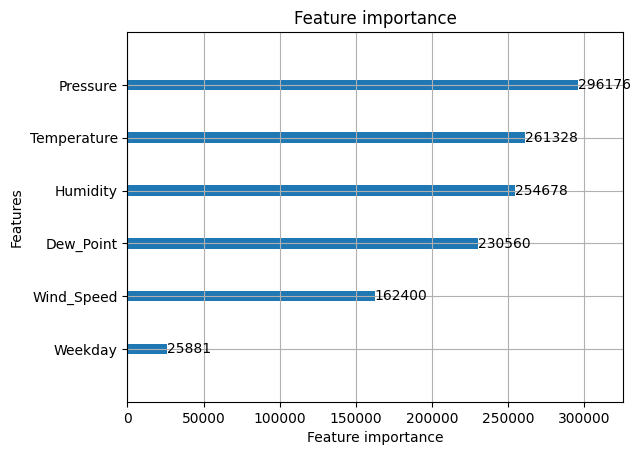

In [80]:
lgb.plot_importance(model_JCPL_CIEP, max_num_features = 6)